Matplotlib is building the font cache; this may take a moment.
/var/folders/nb/2k0r013930v12gcbl3y1vc100000gn/T/ipykernel_51521/230347865.py:27: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  quasi_random = sampler.random(n=M).flatten()


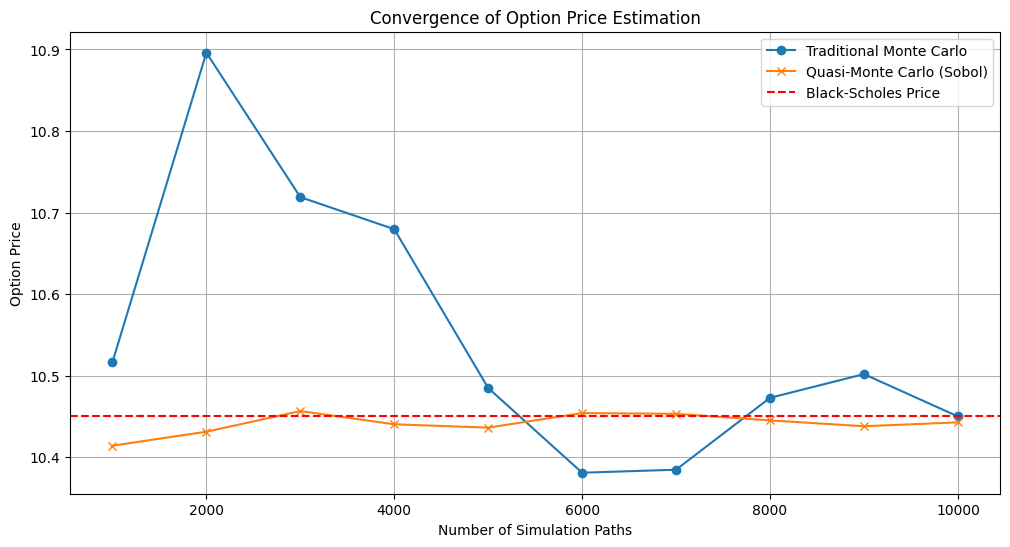

Black-Scholes Price: 10.4506
MC Price with 10000 paths: 10.4502
QMC Price with 10000 paths: 10.4429


In [2]:
import numpy as np
from scipy.stats import norm
from scipy.stats import qmc
import matplotlib.pyplot as plt

# Parameters
S0 = 100        # Initial stock price
K = 100         # Strike price
T = 1.0         # Time to maturity in years
r = 0.05        # Risk-free rate
sigma = 0.2     # Volatility
M = 10000       # Number of paths for both MC and QMC

# Function to simulate paths and price European call via traditional MC
def monte_carlo_price(M, seed=42):
    np.random.seed(seed)
    Z = np.random.normal(0, 1, M)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)
    price = np.exp(-r * T) * np.mean(payoffs)
    return price

# Function to simulate using QMC (Sobol sequence)
def quasi_monte_carlo_price(M):
    sampler = qmc.Sobol(d=1, scramble=False)
    # Generate M quasi-random numbers in (0,1)
    quasi_random = sampler.random(n=M).flatten()
    # Convert uniform to standard normal using inverse CDF
    Z = norm.ppf(quasi_random)
    ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)
    price = np.exp(-r * T) * np.mean(payoffs)
    return price

# Compute prices for increasing number of paths to compare convergence
path_counts = np.arange(1000, M+1000, 1000)
mc_prices = []
qmc_prices = []

for paths in path_counts:
    mc_prices.append(monte_carlo_price(paths))
    qmc_prices.append(quasi_monte_carlo_price(paths))

# Black-Scholes Analytical Price for Reference
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
bs_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Plot convergence comparison
plt.figure(figsize=(12, 6))
plt.plot(path_counts, mc_prices, label='Traditional Monte Carlo', marker='o')
plt.plot(path_counts, qmc_prices, label='Quasi-Monte Carlo (Sobol)', marker='x')
plt.axhline(bs_price, color='red', linestyle='--', label='Black-Scholes Price')
plt.xlabel('Number of Simulation Paths')
plt.ylabel('Option Price')
plt.title('Convergence of Option Price Estimation')
plt.legend()
plt.grid(True)
plt.show()

print(f"Black-Scholes Price: {bs_price:.4f}")
print(f"MC Price with {M} paths: {mc_prices[-1]:.4f}")
print(f"QMC Price with {M} paths: {qmc_prices[-1]:.4f}")
